<a href="https://colab.research.google.com/github/rohanrohan2012/ipl_datasets/blob/master/pollster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [47]:
url='https://raw.githubusercontent.com/rohanrohan2012/ipl_datasets/master/election/presidential_polls.csv'
df = pd.read_csv(url)
df.head(5)


,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,24316.0,lv,6.139129,37.69,35.07,6.18,NaN,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1128.0,lv,4.197292,45.00,46.00,3.00,NaN,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1024.0,lv,3.876856,48.00,42.00,6.00,NaN,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,1251.0,lv,3.403096,48.00,45.00,2.00,NaN,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,2120.0,rv,3.394646,46.00,40.00,6.00,NaN,45.32744,42.20888,3.618320,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,15:09:38 1 Nov 2016


In [0]:
df_florida = df[df.state=='Florida']

In [49]:
print(df_florida.shape)
print(type(df_florida))

(360, 27)
<class 'pandas.core.frame.DataFrame'>


In [50]:
df_florida.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,1251.0,lv,3.403096,48.0,45.0,2.0,NaN,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
11,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/25/2016,10/27/2016,Siena College,A,815.0,lv,2.755075,42.0,46.0,4.0,NaN,41.81832,47.92262,2.676897,NaN,NaN,http://www.nytimes.com/interactive/2016/10/30/...,47771,74761,10/30/16,15:09:38 1 Nov 2016
15,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/25/2016,10/26/2016,Marist College,A,779.0,lv,2.724520,45.0,44.0,5.0,NaN,43.19458,45.07725,3.499082,NaN,NaN,http://www.nbcnews.com/meet-the-press/polls-cl...,47776,74770,10/30/16,15:09:38 1 Nov 2016
17,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/21/2016,10/24/2016,Selzer & Company,A+,805.0,lv,2.694791,43.0,45.0,4.0,NaN,42.67789,46.11255,3.054228,NaN,NaN,http://www.bloomberg.com/politics/articles/201...,47469,74257,10/26/16,15:09:38 1 Nov 2016
46,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/25/2016,University of North Florida,B+,819.0,lv,2.179954,43.0,39.0,6.0,NaN,43.94143,42.24168,4.507492,NaN,NaN,http://www.firstcoastnews.com/news/unf-poll-sh...,47549,74383,10/27/16,15:09:38 1 Nov 2016


In [51]:
polling = df_florida['pollster'].unique()
print(type(polling))
print(len(polling))
polling

<class 'numpy.ndarray'>
33


array(['SurveyUSA', 'Siena College', 'Marist College', 'Selzer & Company',
       'University of North Florida', 'Remington', 'Gravis Marketing',
       'SurveyMonkey', 'YouGov', 'Public Policy Polling',
       'Saint Leo University', 'Associated Industries of Florida',
       'Dixie Strategies', 'Emerson College',
       'Rasmussen Reports/Pulse Opinion Research',
       'The Times-Picayune/Lucid', 'Quinnipiac University',
       'Florida Atlantic University', 'Opinion Savvy/InsiderAdvantage',
       'Cherry Communications', 'Google Consumer Surveys',
       'Mason-Dixon Polling & Research, Inc.', 'Ipsos',
       'CNN/Opinion Research Corp.', 'Suffolk University',
       'Monmouth University', 'Global Strategy Group', 'JMC Enterprises',
       'icitizen', 'Greenberg Quinlan Rosner (Democracy Corps)',
       'OnMessage Inc.', 'Evolving Strategies',
       'Florida Southern College'], dtype=object)

In [52]:
pollsters = polling[0:5]
print(type(pollsters))
print(len(pollsters))
pollsters

<class 'numpy.ndarray'>
5


array(['SurveyUSA', 'Siena College', 'Marist College', 'Selzer & Company',
       'University of North Florida'], dtype=object)

In [53]:

list_by_pollster = []

for poll in pollsters:
  list_by_pollster.append(df_florida[df_florida.pollster == poll])

#print(type(list_by_pollster))
#print(list_by_pollster[0])

trump_voteshare = []

for voteshare in list_by_pollster:
  trump_voteshare.append(voteshare['adjpoll_trump'].mean())

print(type(trump_voteshare))
print(trump_voteshare)

clinton_voteshare = []

for voteshare in list_by_pollster:
  clinton_voteshare.append(voteshare['adjpoll_clinton'].mean())

print(type(clinton_voteshare))
print(clinton_voteshare)


 

<class 'list'>
[44.87134777777778, 45.787591666666664, 43.77052266666667, 46.11279, 42.27662]
<class 'list'>
[44.840785555555556, 42.470850000000006, 43.99385200000001, 42.670683333333336, 43.612136666666665]


In [54]:
#Appending actual results

#R-49%
#D-47.8

trump_voteshare.append(49.00)
clinton_voteshare.append(47.8)

print(trump_voteshare)
print(clinton_voteshare)

[44.87134777777778, 45.787591666666664, 43.77052266666667, 46.11279, 42.27662, 49.0]
[44.840785555555556, 42.470850000000006, 43.99385200000001, 42.670683333333336, 43.612136666666665, 47.8]


In [55]:
pollsters

array(['SurveyUSA', 'Siena College', 'Marist College', 'Selzer & Company',
       'University of North Florida'], dtype=object)

In [56]:

lst = list(pollsters)
lst.append('Actual')

pollsters = np.asarray(lst)
pollsters

array(['SurveyUSA', 'Siena College', 'Marist College', 'Selzer & Company',
       'University of North Florida', 'Actual'], dtype='<U27')

In [57]:
print(type(pollsters))
print(len(pollsters))

<class 'numpy.ndarray'>
6


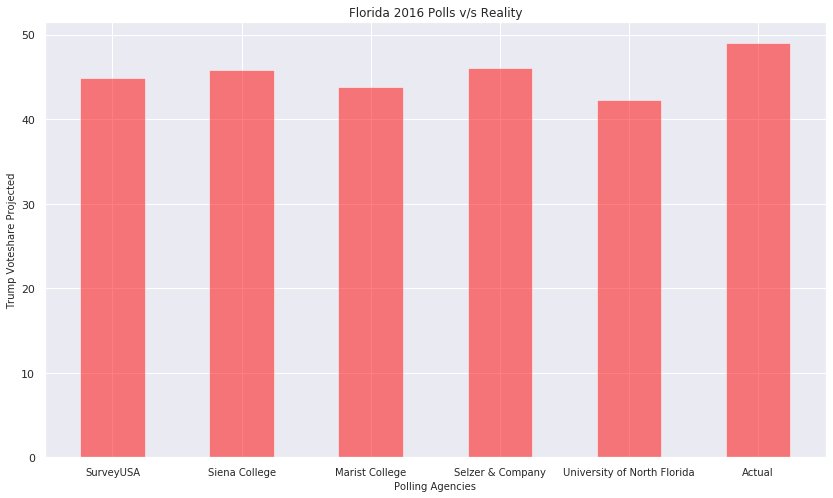

In [99]:
index=np.arange(len(pollsters))
plt.figure(figsize=(14,8))
plt.bar(index,trump_voteshare,width=0.5,align='center',alpha=0.5,color='red')
plt.xlabel('Polling Agencies',fontsize=10)
plt.ylabel('Trump Voteshare Projected',fontsize=10)
plt.xticks(index, pollsters, fontsize=10)
plt.title('Florida 2016 Polls v/s Reality')
plt.show()

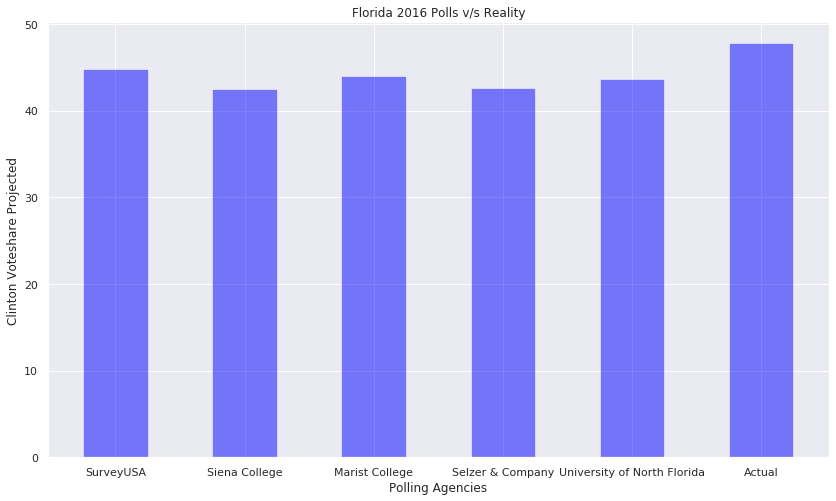

In [100]:
index = np.arange(len(pollsters))
plt.figure(figsize=(14,8))
plt.bar(index,clinton_voteshare,width=0.5,align='center',alpha=0.5,color='blue')
plt.xlabel('Polling Agencies')
plt.ylabel('Clinton Voteshare Projected')
plt.title('Florida 2016 Polls v/s Reality')
plt.xticks(index,pollsters)
plt.show()

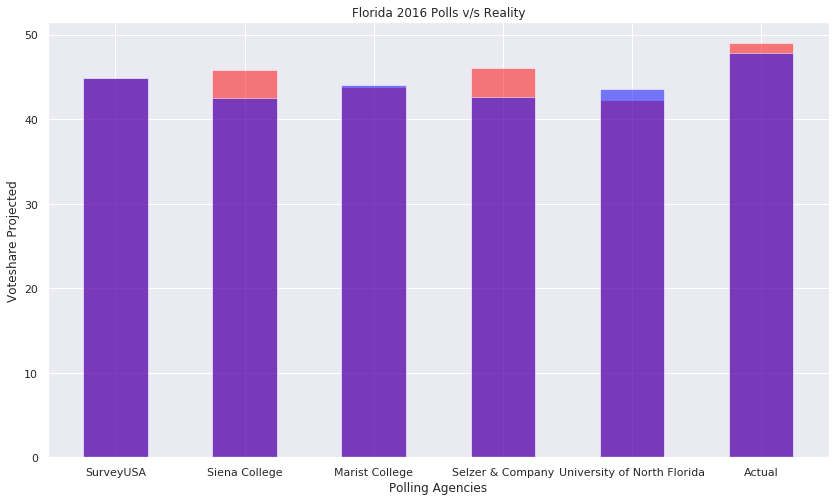

In [101]:
index = np.arange(len(pollsters))
plt.figure(figsize=(14,8))
plt.bar(index,trump_voteshare,width=0.5,align='center',alpha=0.5,color='red')
plt.bar(index,clinton_voteshare,width=0.5,alpha=0.5,align='center',color='blue')
plt.xlabel('Polling Agencies')
plt.ylabel('Voteshare Projected')
plt.title('Florida 2016 Polls v/s Reality')
plt.xticks(index,pollsters)
plt.show()

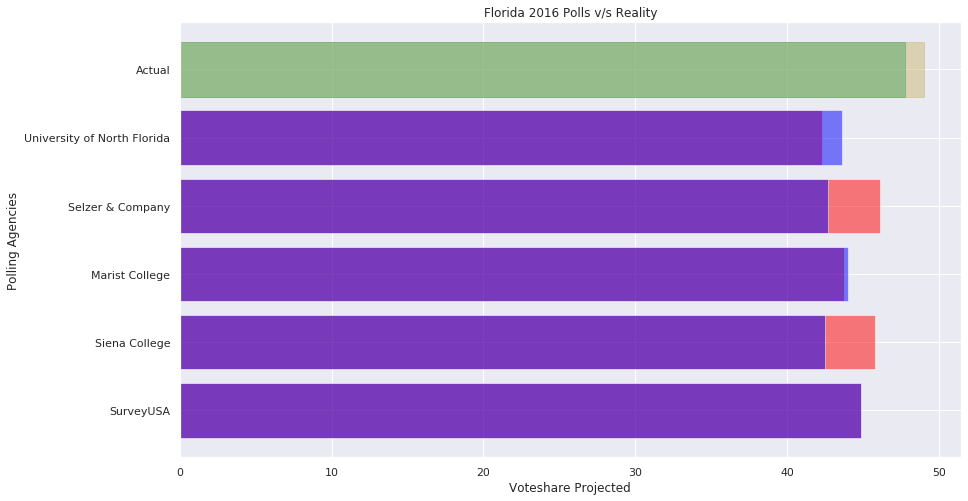

In [116]:

index = np.arange(len(pollsters))
plt.figure(figsize=(14,8))

barlist_1=plt.barh(index,trump_voteshare,align='center',alpha=0.5,color='red')
barlist_1[5].set_color('y')
barlist_2=plt.barh(index,clinton_voteshare,alpha=0.5,align='center',color='blue')
barlist_2[5].set_color('g')
plt.ylabel('Polling Agencies')
plt.xlabel('Voteshare Projected')
plt.title('Florida 2016 Polls v/s Reality')
plt.yticks(index,pollsters)
plt.show()
